# **Atividade 1**
## Aprendizado de máquina e inteligência artificial em física
### Considere a base de dados contida no arquivo Stars.csv, disponível para download na página da
### disciplina no Moodle, sobre as características observadas de um conjunto de 240 estrelas.
### Elabore um código em Python para o processamento desses dados de forma a responder as 
### seguintes questões:
### 1) Como os dados devem ser preparados para o processamento?
### 2) Quais as variáveis devem ser reescalonadas e por qual método?
### 3) Aplique a redução de variáveis pelo método PCA e determine o número de componentes 
### necessárias para se explicar, pelo menos, 90% da variância dos dados.
### 4) Olhando as três primeiras componentes principais do PCA, quais a variáveis da tabela são mais 
### importantes para o agrupamento dos dados?
### 5) Utilize o método de agrupamento hierárquico para agrupar as estrelas de acordo com suas 
### características. Qual o número de agrupamentos ideal para análise desses dados?
### 6) Utilize o método KMeans para agrupar as estrelas de acordo com suas características. Qual o 
### número de agrupamentos ideal para análise desses dados?
### 7) Utilize o método DBSCAN para agrupar as estrelas de acordo com suas caraterísticas. Qual o 
### número de agrupamentos obtido? Comente sobre a presença ou não de outliers.
### 8) Faça uma análise sobre a performance geral dos algoritmos utilizados nos itens de 5 a 7.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

Importando os dados:

In [2]:
dados = pd.read_csv('Stars.csv')

In [3]:
display(dados)

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,Blue,O,5
236,30839,834042.000000,1194.0000,-10.63,Blue,O,5
237,8829,537493.000000,1423.0000,-10.73,White,A,5
238,9235,404940.000000,1112.0000,-11.23,White,A,5


Pré-processamento dos dados:

In [4]:
#verificando se há dados nulos
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature     240 non-null    int64  
 1   L               240 non-null    float64
 2   R               240 non-null    float64
 3   A_M             240 non-null    float64
 4   Color           240 non-null    object 
 5   Spectral_Class  240 non-null    object 
 6   Type            240 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 13.3+ KB


In [5]:
#Observando se existem valores que não fazem sentido (por exemplo, temperatura negativa...)
dados.describe()

,Temperature,L,R,A_M,Type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


Observando as colunas que não carregam int ou float como valores:

In [6]:
#Valores possíveis da feature Spectral_Class:
dados['Spectral_Class'].unique()

array(['M', 'B', 'A', 'F', 'O', 'K', 'G'], dtype=object)

In [7]:
#Valores possíveis da feature Color:
dados['Color'].unique()

array(['Red', 'Blue White', 'White', 'Yellowish White', 'Blue white',
       'Pale yellow orange', 'Blue', 'Blue-white', 'Whitish',
       'yellow-white', 'Orange', 'White-Yellow', 'white', 'yellowish',
       'Yellowish', 'Orange-Red', 'Blue-White'], dtype=object)

Plot de correlação (sem as features não numéricas)

<Axes: >

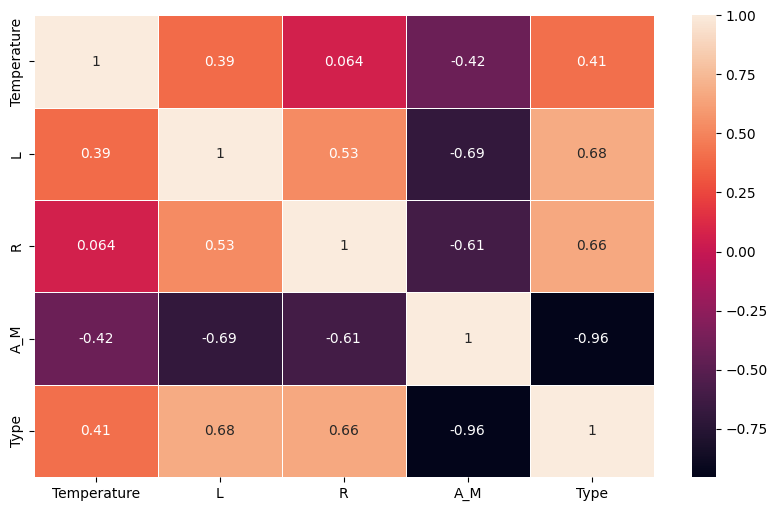

In [8]:
plt.figure(figsize = (10,6))
sns.heatmap(data = dados.drop(['Color','Spectral_Class'], axis=1).corr(), annot = True, linewidth = 0.5)

Vamos codificar as colunas não numéricas de duas formas diferentes. Uma com o OneHotEncoder e outra com o LabelEncoder.

In [9]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()

In [10]:
codificador = LabelEncoder()

In [50]:
dados_1 = pd.read_csv('Stars.csv')
dados_2 = pd.read_csv('Stars.csv')

In [51]:
dados_2['Color'] = codificador.fit_transform(dados_2['Color'])
dados_2['Spectral_Class'] = codificador.fit_transform(dados_2['Spectral_Class'])

dados_1 foi codificado com OneHotEncoder.

In [52]:
encoder.fit_transform(dados_1['Spectral_Class'].values.reshape(-1,1))
buffer = encoder.transform(dados_1['Spectral_Class'].values.reshape(-1,1)).toarray()
dados_provisorio = pd.DataFrame(data=buffer, columns=dados['Spectral_Class'].unique().tolist())
dados_1 = dados_1.join(dados_provisorio)
encoder.fit_transform(dados_1['Color'].values.reshape(-1,1))
buffer = encoder.transform(dados_1['Color'].values.reshape(-1,1)).toarray()
dados_provisorio = pd.DataFrame(data=buffer, columns=dados['Color'].unique().tolist())
dados_1 = dados_1.join(dados_provisorio)

dados_1 = dados_1.drop(columns=['Color', 'Spectral_Class'])
display(dados_1)

,Temperature,L,R,A_M,Type,M,B,A,F,O,...,Blue-white,Whitish,yellow-white,Orange,White-Yellow,white,yellowish,Yellowish,Orange-Red,Blue-White
0,3068,0.002400,0.1700,16.12,0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3042,0.000500,0.1542,16.60,0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2600,0.000300,0.1020,18.70,0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2800,0.000200,0.1600,16.65,0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1939,0.000138,0.1030,20.06,0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
236,30839,834042.000000,1194.0000,-10.63,5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
237,8829,537493.000000,1423.0000,-10.73,5,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
238,9235,404940.000000,1112.0000,-11.23,5,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


dados_2 foi codificado com LabelEncoder.

In [14]:
display(dados_2)

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,8,5,0
1,3042,0.000500,0.1542,16.60,8,5,0
2,2600,0.000300,0.1020,18.70,8,5,0
3,2800,0.000200,0.1600,16.65,8,5,0
4,1939,0.000138,0.1030,20.06,8,5,0
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,0,6,5
236,30839,834042.000000,1194.0000,-10.63,0,6,5
237,8829,537493.000000,1423.0000,-10.73,9,0,5
238,9235,404940.000000,1112.0000,-11.23,9,0,5


Matriz de correlação para os dados que foram codificados com OneHotEncoder:

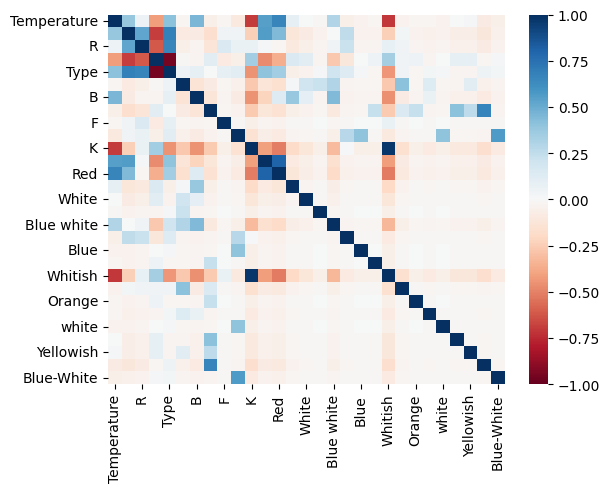

In [15]:
matriz_corr = dados_1.corr().round(2)
sns.heatmap(matriz_corr, cmap = 'RdBu', vmin=-1, vmax=1);

Matriz de correlação para os dados que foram codificados com LabelEncoder:

<Axes: >

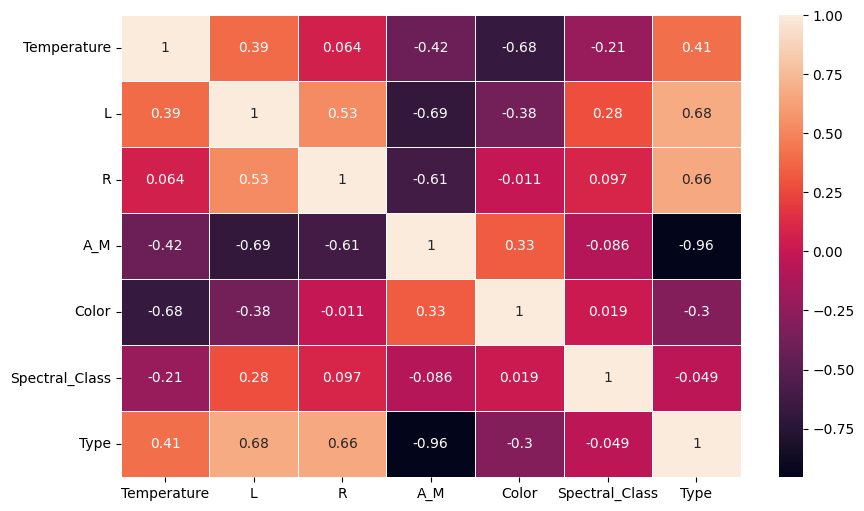

In [16]:
plt.figure(figsize = (10,6))
sns.heatmap(data = dados_2.corr(), annot = True, linewidth = 0.5)

Agora vamos normalizar os dados. Vamos testar duas formas diferentes, uma com StandardScaler e outra com MinMaxScaler. Vamos aplica-las tanto aos dados codificados com OneHotEncoder quanto aos dados codificados com LabelEncoder.

In [53]:
from sklearn.preprocessing import StandardScaler

scalerSS = StandardScaler()
dados_1_stsc = dados_1
dados_2_stsc = dados_2

for column in ['Temperature','L','R','A_M','Type']:
    dados_1_stsc[column] = scalerSS.fit_transform(dados_1[[column]])

for column in ['Temperature','L','R','A_M','Type','Color','Spectral_Class']:
    dados_2_stsc[column] = scalerSS.fit_transform(dados_2[[column]])

In [54]:
display(pd.DataFrame(dados_1_stsc))

,Temperature,L,R,A_M,Type,M,B,A,F,O,...,Blue-white,Whitish,yellow-white,Orange,White-Yellow,white,yellowish,Yellowish,Orange-Red,Blue-White
0,-0.779382,-0.598624,-0.459210,1.116745,-1.46385,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.782110,-0.598624,-0.459241,1.162414,-1.46385,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.828477,-0.598624,-0.459342,1.362213,-1.46385,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.807496,-0.598624,-0.459229,1.167171,-1.46385,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.897819,-0.598624,-0.459340,1.491607,-1.46385,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,2.983743,1.494720,2.167974,-1.361718,1.46385,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
236,2.133913,4.059319,1.854068,-1.428317,1.46385,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
237,-0.175029,2.403157,2.297800,-1.437832,1.46385,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
238,-0.132438,1.662878,1.695177,-1.485403,1.46385,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
display(pd.DataFrame(dados_2_stsc))

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,-0.779382,-0.598624,-0.459210,1.116745,0.531788,0.595338,-1.46385
1,-0.782110,-0.598624,-0.459241,1.162414,0.531788,0.595338,-1.46385
2,-0.828477,-0.598624,-0.459342,1.362213,0.531788,0.595338,-1.46385
3,-0.807496,-0.598624,-0.459229,1.167171,0.531788,0.595338,-1.46385
4,-0.897819,-0.598624,-0.459340,1.491607,0.531788,0.595338,-1.46385
...,...,...,...,...,...,...,...
235,2.983743,1.494720,2.167974,-1.361718,-1.373124,1.074805,1.46385
236,2.133913,4.059319,1.854068,-1.428317,-1.373124,1.074805,1.46385
237,-0.175029,2.403157,2.297800,-1.437832,0.769902,-1.801997,1.46385
238,-0.132438,1.662878,1.695177,-1.485403,0.769902,-1.801997,1.46385


In [56]:
from sklearn.preprocessing import MinMaxScaler
scalerMM = MinMaxScaler()

In [58]:
dados_1 = pd.read_csv('Stars.csv')
dados_2 = pd.read_csv('Stars.csv')

dados_2['Color'] = codificador.fit_transform(dados_2['Color'])
dados_2['Spectral_Class'] = codificador.fit_transform(dados_2['Spectral_Class'])

encoder.fit_transform(dados_1['Spectral_Class'].values.reshape(-1,1))
buffer = encoder.transform(dados_1['Spectral_Class'].values.reshape(-1,1)).toarray()
dados_provisorio = pd.DataFrame(data=buffer, columns=dados['Spectral_Class'].unique().tolist())
dados_1 = dados_1.join(dados_provisorio)
encoder.fit_transform(dados_1['Color'].values.reshape(-1,1))
buffer = encoder.transform(dados_1['Color'].values.reshape(-1,1)).toarray()
dados_provisorio = pd.DataFrame(data=buffer, columns=dados['Color'].unique().tolist())
dados_1 = dados_1.join(dados_provisorio)

dados_1 = dados_1.drop(columns=['Color', 'Spectral_Class'])

In [59]:
for column in ['Temperature','L','R','A_M','Type']:
    dados_1[column] = scalerMM.fit_transform(dados_1[[column]])

for column in ['Temperature','L','R','A_M','Type','Color','Spectral_Class']:
    dados_2[column] = scalerMM.fit_transform(dados_2[[column]])

In [60]:
display(dados_1)

,Temperature,L,R,A_M,Type,M,B,A,F,O,...,Blue-white,Whitish,yellow-white,Orange,White-Yellow,white,yellowish,Yellowish,Orange-Red,Blue-White
0,0.029663,2.731275e-09,0.000083,0.876798,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.028980,4.944550e-10,0.000075,0.891807,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.017367,2.590003e-10,0.000048,0.957473,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.022622,1.412729e-10,0.000078,0.893371,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,6.828189e-11,0.000049,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,0.972150,4.412776e-01,0.695919,0.062226,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
236,0.759307,9.818959e-01,0.612777,0.040338,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
237,0.181025,6.327765e-01,0.730304,0.037211,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
238,0.191692,4.767253e-01,0.570694,0.021576,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [61]:
display(dados_2)

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,0.029663,2.731275e-09,0.000083,0.876798,0.5000,0.833333,0.0
1,0.028980,4.944550e-10,0.000075,0.891807,0.5000,0.833333,0.0
2,0.017367,2.590003e-10,0.000048,0.957473,0.5000,0.833333,0.0
3,0.022622,1.412729e-10,0.000078,0.893371,0.5000,0.833333,0.0
4,0.000000,6.828189e-11,0.000049,1.000000,0.5000,0.833333,0.0
...,...,...,...,...,...,...,...
235,0.972150,4.412776e-01,0.695919,0.062226,0.0000,1.000000,1.0
236,0.759307,9.818959e-01,0.612777,0.040338,0.0000,1.000000,1.0
237,0.181025,6.327765e-01,0.730304,0.037211,0.5625,0.000000,1.0
238,0.191692,4.767253e-01,0.570694,0.021576,0.5625,0.000000,1.0


Portanto, temos "quatro" base de dados, que são compostos pela mesma base de dados, porém com codificação das colunas não numéricas e normalização diferentes.

Agora vamos aplicar uma redução de dimensionalidade por meio do PCA.

In [24]:
from sklearn.decomposition import PCA
from matplotlib.colors import LogNorm

Aplicando a cada um dos dados:

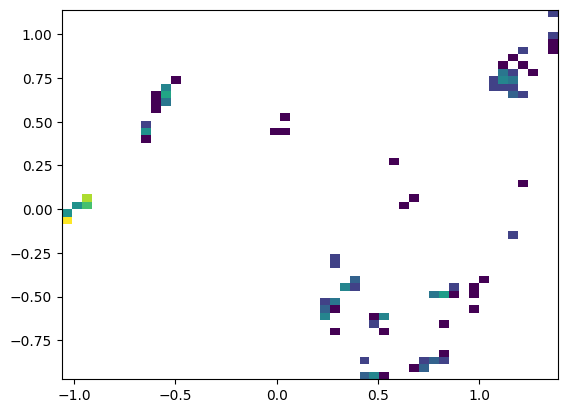

In [62]:
#LabelEncoder + MinMaxScaler
pca = PCA()
pca.fit(dados_1)
expl = pca.explained_variance_ratio_
svalues = pca.singular_values_
dados1pca = pca.transform(dados_1)
plt.hist2d(dados1pca[:,0],dados1pca[:,1],bins=50,  norm=LogNorm());

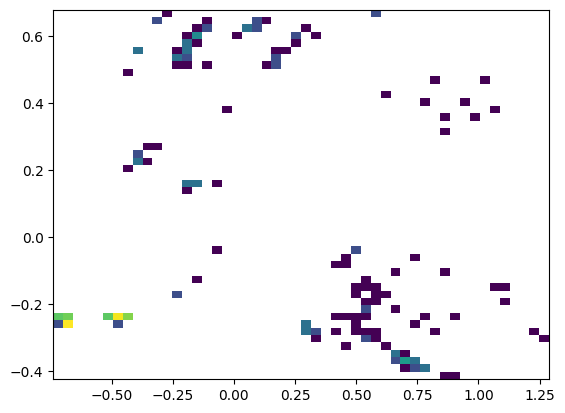

In [63]:
#OneHotEncoder + MinMaxScaler
pca = PCA()
pca.fit(dados_2)
expl = pca.explained_variance_ratio_
svalues = pca.singular_values_
dados2pca = pca.transform(dados_2)
plt.hist2d(dados2pca[:,0],dados2pca[:,1],bins=50,  norm=LogNorm());

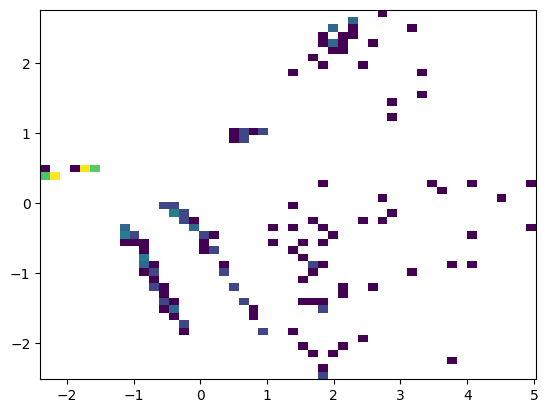

In [64]:
#LabelEncoder + StandartScaler
pca = PCA()
pca.fit(dados_1_stsc)
expl = pca.explained_variance_ratio_
svalues = pca.singular_values_
dados1ss_pca = pca.transform(dados_1_stsc)
plt.hist2d(dados1ss_pca[:,0],dados1ss_pca[:,1],bins=50,  norm=LogNorm());

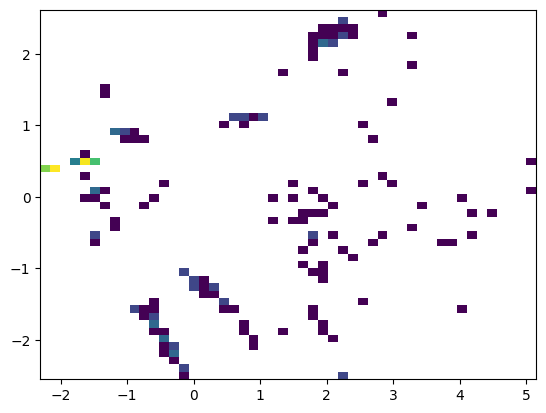

In [65]:
#OneHotEncoder + StandartScaler
pca = PCA()
pca.fit(dados_2_stsc)
expl = pca.explained_variance_ratio_
svalues = pca.singular_values_
dados2ss_pca = pca.transform(dados_2_stsc)
plt.hist2d(dados2ss_pca[:,0],dados2ss_pca[:,1],bins=50,  norm=LogNorm());

In [66]:
import numpy as np

Vamos observar a explicabilidade dos dados em função de suas componentes. Queremos as componentes que explicam 90% dos dados:

90%% dos dados são explicados com as 5 componentes.


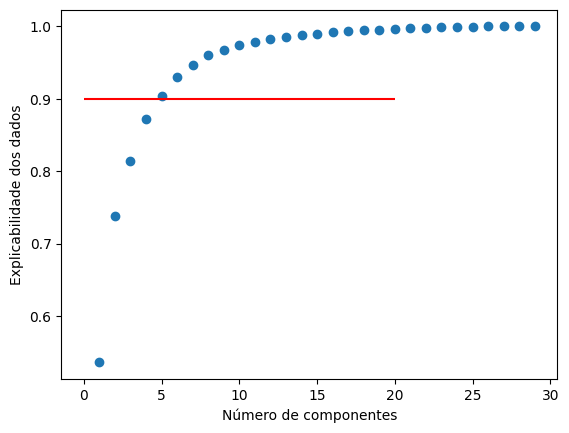

In [83]:
#OneHotEncoder + StandartScaler
pca = PCA()
pca.fit(dados_1_stsc)
explainability = pca.explained_variance_ratio_.cumsum()
factors = np.arange(1,dados_1_stsc.shape[1]+1,1)
plt.scatter(factors,explainability)
plt.hlines(0.9,0,20,'r')
plt.xlabel('Número de componentes')
plt.ylabel('Explicabilidade dos dados')

p = factors[explainability<0.9].max()+1

if p<2:
    p=2
    
print('90%% dos dados são explicados com as ' + str(p) + ' componentes.')

pca1 = PCA(n_components=p)
pca1.fit(dados_1_stsc)
dados1pca_ss = pca1.transform(dados_1_stsc)

#x = x[:,0:p]
#x.shape

90%% dos dados são explicados com as 4 componentes.


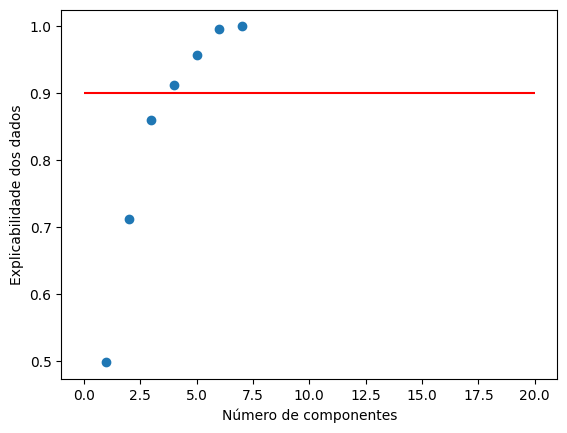

In [84]:
#LabelEncoder + StandartScaler
pca = PCA()
pca.fit(dados_2_stsc)
explainability = pca.explained_variance_ratio_.cumsum()
factors = np.arange(1,dados_2_stsc.shape[1]+1,1)
plt.scatter(factors,explainability)
plt.hlines(0.9,0,20,'r')
plt.xlabel('Número de componentes')
plt.ylabel('Explicabilidade dos dados')

p = factors[explainability<0.9].max()+1

if p<2:
    p=2
    
print('90%% dos dados são explicados com as ' + str(p) + ' componentes.')

pca2 = PCA(n_components=p)
pca2.fit(dados_2_stsc)
dados2pca_ss = pca2.transform(dados_2_stsc)

#x = x[:,0:p]
#x.shape

90%% dos dados são explicados com as 8 componentes.


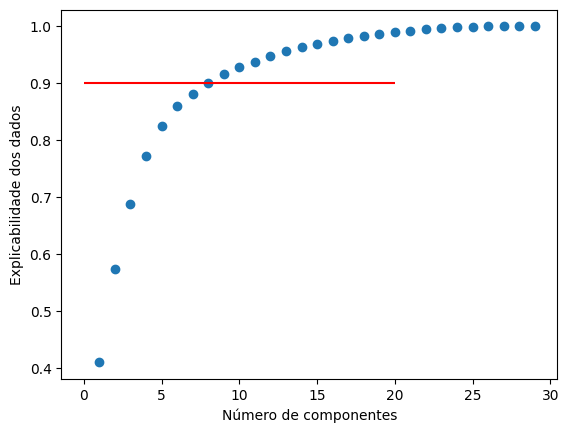

In [85]:
#OneHotEncoder + MinMaxScaler
pca = PCA()
pca.fit(dados_1)
explainability = pca.explained_variance_ratio_.cumsum()
factors = np.arange(1,dados_1.shape[1]+1,1)
plt.scatter(factors,explainability)
plt.hlines(0.9,0,20,'r')
plt.xlabel('Número de componentes')
plt.ylabel('Explicabilidade dos dados')

p = factors[explainability<0.9].max()+1

if p<2:
    p=2
    
print('90%% dos dados são explicados com as ' + str(p) + ' componentes.')

pca3 = PCA(n_components=p)
pca3.fit(dados_1)
dados1pcaMM = pca3.transform(dados_1)

#x = x[:,0:p]
#x.shape

90%% dos dados são explicados com as 4 componentes.


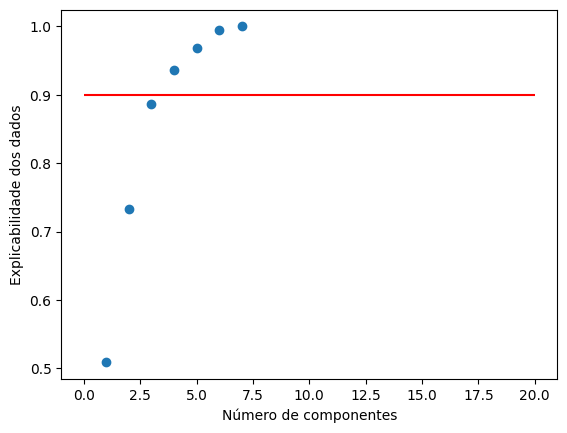

In [86]:
#LabelEncoder + MinMaxScaler
pca = PCA()
pca.fit(dados_2)
explainability = pca.explained_variance_ratio_.cumsum()
factors = np.arange(1,dados_2.shape[1]+1,1)
plt.scatter(factors,explainability)
plt.hlines(0.9,0,20,'r')
plt.xlabel('Número de componentes')
plt.ylabel('Explicabilidade dos dados')

p = factors[explainability<0.9].max()+1

if p<2:
    p=2
    
print('90%% dos dados são explicados com as ' + str(p) + ' componentes.')

pca4 = PCA(n_components=p)
pca4.fit(dados_2)
dados2pcaMM = pca4.transform(dados_2)

#x = x[:,0:p]
#x.shape

Podemos perceber que foi necessário um menor número de componentes para a explicabilidade de 90% nos dados em que foi usado o codificador LabelEncoder. Portanto, vamos considerar apenas os dados aos quais foi aplicado essa codificação.

Agora vamos encontrar quais features são as 4 componentes principais.

In [126]:
# number of components in pca4
n_pcs= pca4.components_.shape[0]

# get the index of the most important feature on EACH component i.e. largest absolute value
# using LIST COMPREHENSION HERE
most_important = [np.abs(pca4.components_[i]).argmax() for i in range(n_pcs)]

initial_feature_names = ['Temperature', 'L', 'R', 'A_M', 'Color', 'Spectral_Class', 'Type']

# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

# using LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i+1): most_important_names[i] for i in range(n_pcs)}

# build the dataframe
df = pd.DataFrame(sorted(dic.items()))
display(df)

,0,1
0,PC1,Type
1,PC2,Spectral_Class
2,PC3,Color
3,PC4,R


Outro modo seria encontrar as fetures em que o valor na tabela é o maior em sua linha.

In [93]:
print(pd.DataFrame(pca4.components_.round(2),columns=dados.columns,index = ['PC-1','PC-2','PC-3','PC-4']))

      Temperature     L     R   A_M  Color  Spectral_Class  Type
PC-1         0.24  0.30  0.33 -0.58  -0.22            0.04  0.60
PC-2         0.31 -0.13 -0.16  0.05  -0.20           -0.90  0.05
PC-3         0.48  0.11 -0.39  0.09  -0.66            0.36 -0.20
PC-4         0.07  0.15  0.81  0.41  -0.29           -0.07 -0.26


O índice de explicabilidade de cada feature:

In [125]:
print(pd.DataFrame([pca4.explained_variance_ratio_.round(4)],columns=['Type','Spectral_Class','Color','R']))

     Type  Spectral_Class   Color       R
0  0.5085          0.2246  0.1536  0.0497


In [128]:
nPC = 4 #número de componenetes principais encontrado
X = dados2pcaMM[:,0:nPC]

Agora vamos fazer a clusterização.

método de agrupamento hierárquico:

O método de clusterização hierárquica é uma técnica de agrupamento que organiza os dados em uma estrutura de árvore ou dendrograma, onde os clusters são formados em uma hierarquia. Aqui está um resumo breve do processo:

1. **Início**: Cada ponto de dados é considerado como um cluster individual.

2. **Cálculo da Similaridade**: A similaridade entre os clusters é medida usando uma métrica de distância, como distância euclidiana, distância de Manhattan ou correlação. 

3. **Agrupamento**: Os dois clusters mais semelhantes são mesclados em um único cluster. Esse processo é repetido até que todos os pontos de dados estejam em um único cluster ou até que um critério de parada seja atendido.

4. **Construção do Dendrograma**: Durante o processo de mesclagem, um dendrograma é construído para representar a hierarquia de clusters. Ele mostra como os clusters são formados e como eles são agrupados em níveis mais altos da hierarquia.

5. **Corte do Dendrograma**: O dendrograma pode ser cortado em diferentes níveis para obter diferentes partições dos dados, resultando em diferentes números de clusters.

O método de clusterização hierárquica pode ser aglomerativo, onde os clusters são construídos de baixo para cima, ou divisivo, onde os clusters são divididos de cima para baixo. Ele oferece uma visão intuitiva da estrutura dos dados e não requer especificação prévia do número de clusters. No entanto, pode ser computacionalmente intensivo para grandes conjuntos de dados e menos escalável do que outros métodos de agrupamento, como o K-means.

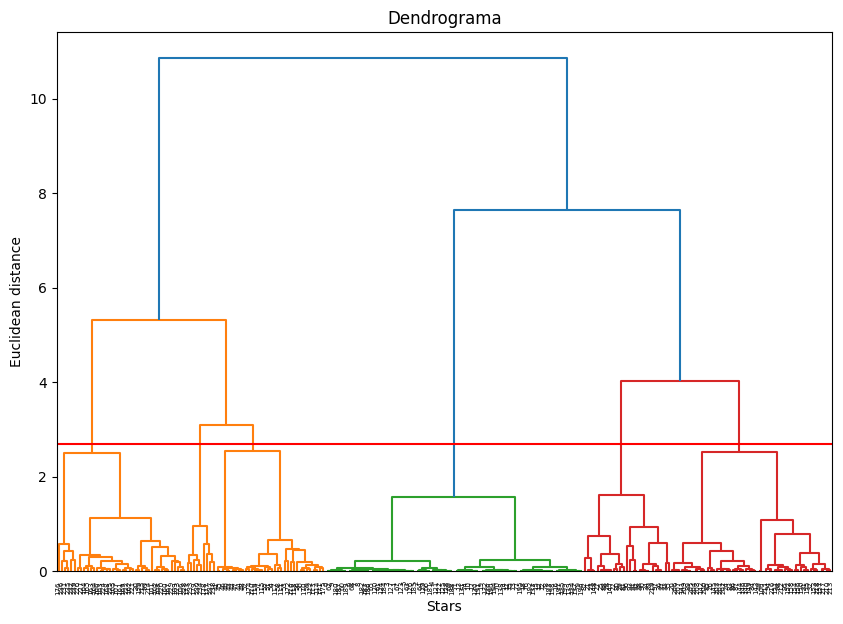

In [150]:
#Vamos encontrar visualmente qual deve ser o número aproximado de clusters
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))
plt.title("Dendrograma")
clusters = shc.linkage(X, method='ward', metric="euclidean")
shc.dendrogram(Z=clusters)
plt.axhline(y=2.7, color='r', linestyle='-')
plt.xlabel('Stars')
plt.ylabel('Euclidean distance');
plt.show()

Através do dendograma e do corte na distância euclidiana igual a 2.6, nota-se um possível número de clusters é 6, ao se contar o número de partições.

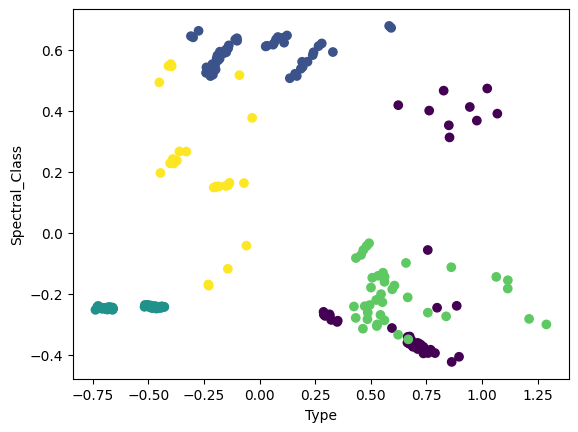

In [131]:
from sklearn.cluster import AgglomerativeClustering 

aggclust = AgglomerativeClustering(n_clusters=5, linkage='ward').fit(X)
categorias = aggclust.labels_
plt.scatter(X[:,0], X[:,1], c=categorias)
plt.xlabel('Type')
plt.ylabel('Spectral_Class');

método KMeans:

O método K-means é um algoritmo de clustering não hierárquico que agrupa dados em k clusters distintos. Aqui está um resumo breve do processo:

1. **Inicialização dos Centróides**: O algoritmo começa selecionando aleatoriamente k pontos no espaço de dados para servir como centróides iniciais dos clusters.

2. **Atribuição dos Pontos aos Clusters**: Cada ponto de dados é atribuído ao cluster cujo centróide é o mais próximo, com base em alguma métrica de distância, comumente a distância euclidiana.

3. **Atualização dos Centróides**: Depois que todos os pontos são atribuídos aos clusters, os centróides são recalculados como a média de todos os pontos atribuídos a cada cluster.

4. **Iteração**: Os passos 2 e 3 são repetidos até que não haja mais mudanças na atribuição dos pontos aos clusters ou até que um número máximo de iterações seja alcançado.

5. **Convergência**: O algoritmo convergirá para um conjunto de centróides finais, onde a atribuição dos pontos aos clusters não muda entre iterações sucessivas.

O método K-means é eficiente computacionalmente e amplamente utilizado devido à sua simplicidade e escalabilidade. No entanto, ele requer que o número de clusters k seja especificado a priori, o que pode ser uma limitação em alguns casos. Além disso, o resultado final do K-means pode depender da escolha inicial dos centróides, o que pode levar a soluções subótimas. Portanto, é comum executar o algoritmo várias vezes com diferentes inicializações e selecionar o melhor resultado com base em algum critério, como a inércia (soma das distâncias quadradas dos pontos ao seu centróide mais próximo).

In [151]:
from sklearn.cluster import KMeans
import ipywidgets as widgets
@widgets.interact(n_clusters=(2, 10))
def kmeans(n_clusters = 2):
    #X = np.array([dados['mean_ElectronAffinity'], dados['critical_temp']]).T
    kmeans = KMeans(n_clusters=n_clusters, n_init='auto').fit(X)
    categorias = kmeans.labels_
    plt.scatter(X[:,0], X[:,1], c=categorias)
    plt.xlabel('Type')
    plt.ylabel('Spectral_Class');
    plt.show()
    plt.clf() # Limpa os eixos
    plt.cla() # Limpa a figura
    plt.close() # Fecha o gráfico

interactive(children=(IntSlider(value=2, description='n_clusters', max=10, min=2), Output()), _dom_classes=('w…

Não sabemos o número ideal de clusters. Para isso, vamos usar o método da silhueta.

O fator de silhueta, juntamente com o número de pontos mal atribuídos, pode fornecer informações valiosas para determinar o número ideal de clusters para o K-means.

1. **Silhueta**: A medida de silhueta avalia a qualidade da clusterização, fornecendo uma pontuação para cada ponto de dados com base na sua coesão dentro do cluster e na separação em relação aos outros clusters. Uma pontuação de silhueta alta indica que os pontos estão bem agrupados em seus clusters, enquanto uma pontuação baixa sugere que os clusters estão sobrepostos ou mal definidos. Ao maximizar a média das pontuações de silhueta, podemos identificar o número ideal de clusters.

2. **Número de pontos mal atribuídos**: Além da medida de silhueta, contar o número de pontos mal atribuídos, ou seja, pontos que estão distantes de seu próprio cluster e mais próximos de outros clusters, também é útil. Um aumento no número de pontos mal atribuídos pode indicar que há muito poucos ou muitos clusters sendo considerados.

Portanto, ao analisar o fator de silhueta e o número de pontos mal atribuídos em diferentes configurações de número de clusters, podemos determinar o número ideal de clusters para o K-means, buscando um equilíbrio entre coesão interna dos clusters e separação entre eles.

c:\Users\Gabriel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Gabriel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Gabriel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Gabriel\AppData\Local\Programs\Python\Python312\Lib\site-packages\skle

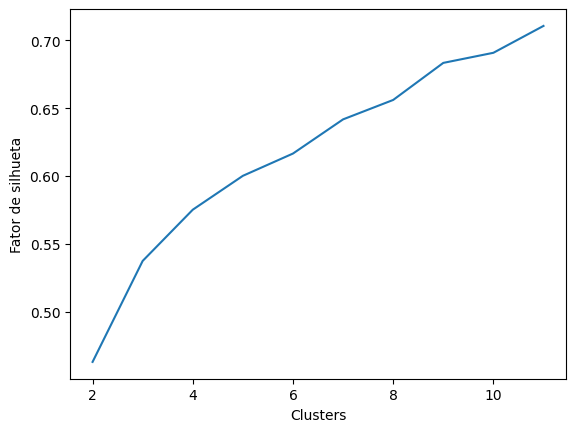

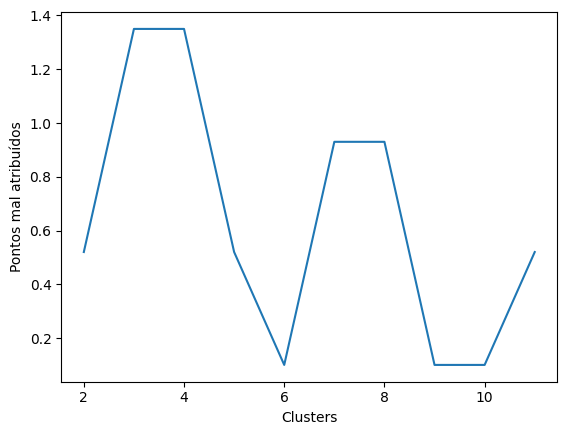

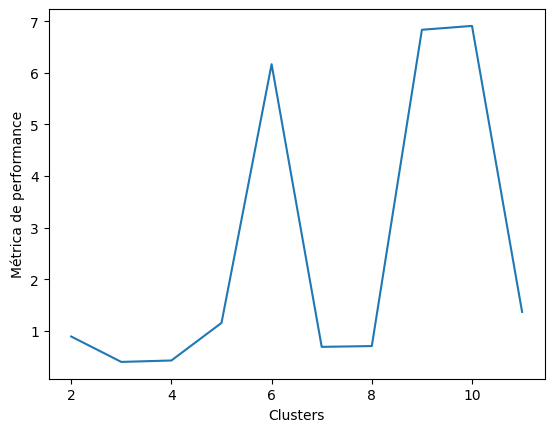

In [135]:
from sklearn.metrics import silhouette_samples, silhouette_score

Ns = np.asarray([2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
silhueta_scores = np.zeros(len(Ns))
pontos_bad = np.zeros(len(Ns))

for i,N in enumerate(Ns):
    kmeans = KMeans(n_clusters=N).fit(X)
    categorias = kmeans.labels_
    silhueta_scores[i] = silhouette_score(X, categorias)
    sample_silhouette_values = silhouette_samples(X, categorias)
    mask = ( sample_silhouette_values < 0 )
    pontos_bad[i] = (0.1 + 100 * mask.sum() / len(mask)).round(2)
    
        
plt.plot(Ns,silhueta_scores);
plt.xlabel('Clusters')
plt.ylabel('Fator de silhueta')

plt.figure()
plt.plot(Ns,pontos_bad)
plt.xlabel('Clusters')
plt.ylabel('Pontos mal atribuídos')

plt.figure()
plt.plot(Ns,silhueta_scores/pontos_bad)
plt.xlabel('Clusters')
plt.ylabel('Métrica de performance')

opt_n_clusters = Ns[(silhueta_scores/pontos_bad).argmax()]

Podemos perceber que o número de cluster ideal seria 10 (embora 6 e 9 sejam valores interessantes também)

c:\Users\Gabriel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


10 é o número de clusters que apresenta o melhor fator de silhueta.


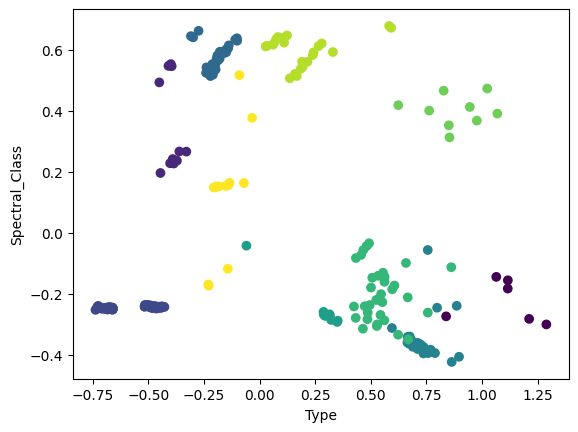

In [152]:
kmeans = KMeans(n_clusters=opt_n_clusters).fit(X)
#kmeans = KMeans(n_clusters=2).fit(x)
categorias = kmeans.labels_

plt.figure()
plt.scatter(X[:,0], X[:,1], c=categorias)
plt.xlabel('Type')
plt.ylabel('Spectral_Class');

print(str(opt_n_clusters) + ' é o número de clusters que apresenta o melhor fator de silhueta.')

Podemos testar com 6 clusters:

c:\Users\Gabriel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


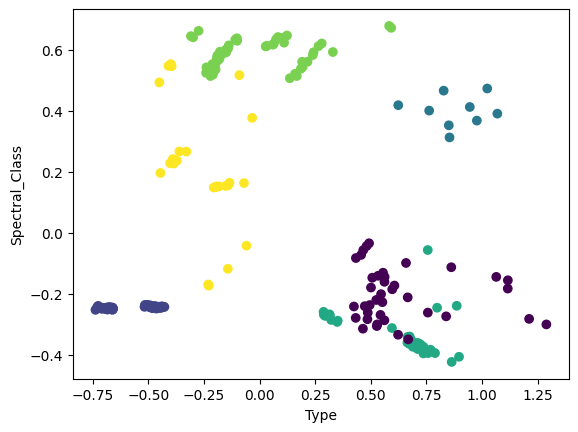

In [153]:
kmeans = KMeans(n_clusters=6).fit(X)
#kmeans = KMeans(n_clusters=2).fit(x)
categorias = kmeans.labels_

plt.figure()
plt.scatter(X[:,0], X[:,1], c=categorias)
plt.xlabel('Type')
plt.ylabel('Spectral_Class');
plt.show()

método DBSCAN:

O DBSCAN (Density-Based Spatial Clustering of Applications with Noise) é um algoritmo de clustering não hierárquico e baseado em densidade. Ele é especialmente útil para identificar clusters de formas arbitrariamente complexas e de diferentes densidades em conjuntos de dados.

**Funcionamento básico**:

1. **Parâmetros**: O DBSCAN requer dois parâmetros principais: epsilon (ε) e min_samples. Epsilon define a distância máxima entre dois pontos para que sejam considerados parte do mesmo cluster, enquanto min_samples especifica o número mínimo de pontos dentro dessa distância para formar um cluster.

2. **Identificação de clusters**: O algoritmo começa com um ponto aleatório e verifica se há pontos suficientes dentro da distância epsilon para formar um cluster. Se houver, esse ponto é rotulado como parte do cluster. Caso contrário, é marcado como ruído. O processo é repetido para todos os pontos do conjunto de dados.

3. **Expansão dos clusters**: O DBSCAN expande os clusters conectando pontos densos. Isso significa que, para cada ponto em um cluster, ele verifica se há outros pontos dentro da distância epsilon. Se houver, esses pontos são adicionados ao mesmo cluster. Esse processo continua até que não haja mais pontos a serem adicionados.

4. **Ruído**: Pontos que não estão dentro da distância epsilon de nenhum outro ponto suficiente são considerados ruído e não são atribuídos a nenhum cluster.

**Vantagens**:

1. **Robustez**: O DBSCAN é eficaz na identificação de clusters de diferentes formas e densidades, sem a necessidade de especificar o número de clusters antecipadamente.

2. **Tolerância a ruído**: Ele é capaz de lidar com ruído no conjunto de dados, marcando pontos isolados como ruído e não os atribuindo a nenhum cluster.

3. **Não requer inicialização aleatória**: Ao contrário do K-means, o DBSCAN não requer uma inicialização aleatória, o que o torna menos sensível a resultados diferentes em diferentes execuções.

**Desafios**:

1. **Sensibilidade aos parâmetros**: A escolha dos parâmetros epsilon e min_samples pode afetar significativamente os resultados do DBSCAN. Encontrar os valores ideais para esses parâmetros pode ser desafiador e requer alguma experiência ou experimentação.

2. **Complexidade computacional**: O DBSCAN pode ser computacionalmente exigente, especialmente para conjuntos de dados grandes, devido à necessidade de calcular as distâncias entre todos os pontos.

Em resumo, o DBSCAN é uma ferramenta poderosa para clustering, especialmente em situações onde os clusters têm diferentes densidades e formas, e onde o ruído está presente nos dados.

In [144]:
from sklearn.cluster import DBSCAN 

@widgets.interact(epsilon=(0.01, 1, 0.03), minN=(1,10))

def dbscan(epsilon = 0.4, minN = 5):
    #X = np.array([dados['mean_ElectronAffinity'], dados['critical_temp']]).T
    dbscan = DBSCAN(eps=epsilon, min_samples=minN).fit(X)
    categorias = dbscan.labels_
    plt.scatter(X[:,0], X[:,1], c=categorias)
    plt.xlabel('Afinidade eletrônica')
    plt.ylabel('Temperatura crítica');
    plt.show()
    plt.clf() # Limpa os eixos
    plt.cla() # Limpa a figura
    plt.close() # Fecha o gráfico

    print(str((categorias == -1).sum())+' Outliers')
    print(str(categorias.max())+' Agrupamentos')

interactive(children=(FloatSlider(value=0.4, description='epsilon', max=1.0, min=0.01, step=0.03), IntSlider(v…

Ao mudar os valores de epslon para um valor maior que 0.4, podemos notar uma mudança significativa nos números de outliers e agrupamentos. Isso pode indicar que é possível que 0.4 seja um valor ideal para epslon.

O mesmo se nota para minN, ao muda-lo para valores acima de 5, o que significa que um possível valor para minN é 5.

Com esses valores para epslon e minN, encontramos que o número de clusters que o DBSSCAN indica é 6.